# DL Models

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, classification_report

In [51]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, LSTM, GRU # type: ignore
from tensorflow.keras.utils import to_categorical # type: ignore
from tensorflow.keras.callbacks import EarlyStopping # type: ignore

In [ ]:
df = pd.read_csv("D:/VIT 2nd Sem/Project Work/Final work/data/student_performance_dataset_with_engineered_features.csv")
df.head()

,age,gender,recent_past_grades,attendance,attention_lectures,stress_level,sleep_hours,sleep_quality,motivation_score,social_support,...,room_sharing,sgpa,stress_sleep_ratio,motivation_stress_diff,screen_sleep_balance,rest_quality_score,mental_health_index,study_support_score,time_drain_score,room_disturbance_score
0,18,Other,6.7,75-85%,2,2,7.7,1,5,1,...,0,4.32,0.259740,3,1.103895,7.7,4,5,1.6,0
1,29,Other,9.4,Below 55%,4,2,5.8,5,3,1,...,1,5.87,0.344827,1,1.844824,29.0,2,10,3.0,3
2,24,Male,7.2,65-75%,5,3,8.1,1,4,5,...,0,4.90,0.370370,1,0.308642,8.1,6,7,7.2,0
3,21,Female,5.5,75-85%,1,4,4.7,4,3,2,...,1,4.00,0.851062,-1,1.212763,18.8,1,6,0.5,5
4,28,Other,8.5,75-85%,3,1,4.4,1,3,4,...,1,5.47,0.227272,2,0.999998,4.4,6,12,1.2,3


In [53]:
def categorize_sgpa(sgpa):
    if sgpa >= 9.0:
        return "Excellent"
    elif sgpa >= 8.0:
        return "Very Good"
    elif sgpa >= 7.0:
        return "Good"
    elif sgpa >= 6.0:
        return "Average"
    else:
        return "Poor"
    
df['sgpa_class'] = df['sgpa'].apply(categorize_sgpa)
df.drop(columns=['sgpa'], inplace=True)
df.head()

,age,gender,recent_past_grades,attendance,attention_lectures,stress_level,sleep_hours,sleep_quality,motivation_score,social_support,...,room_sharing,stress_sleep_ratio,motivation_stress_diff,screen_sleep_balance,rest_quality_score,mental_health_index,study_support_score,time_drain_score,room_disturbance_score,sgpa_class
0,18,Other,6.7,75-85%,2,2,7.7,1,5,1,...,0,0.259740,3,1.103895,7.7,4,5,1.6,0,Poor
1,29,Other,9.4,Below 55%,4,2,5.8,5,3,1,...,1,0.344827,1,1.844824,29.0,2,10,3.0,3,Poor
2,24,Male,7.2,65-75%,5,3,8.1,1,4,5,...,0,0.370370,1,0.308642,8.1,6,7,7.2,0,Poor
3,21,Female,5.5,75-85%,1,4,4.7,4,3,2,...,1,0.851062,-1,1.212763,18.8,1,6,0.5,5,Poor
4,28,Other,8.5,75-85%,3,1,4.4,1,3,4,...,1,0.227272,2,0.999998,4.4,6,12,1.2,3,Poor


In [54]:
X = df.drop(columns=['sgpa_class'])
y = df['sgpa_class']

categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), numerical_cols),
    ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_cols)
])

X_processed = preprocessor.fit_transform(X)

le = LabelEncoder()
y_encoded = le.fit_transform(y)

label_map = {label: idx for idx, label in enumerate(le.classes_)}
print(label_map)


{'Average': 0, 'Excellent': 1, 'Good': 2, 'Poor': 3, 'Very Good': 4}


In [55]:
X_train, X_temp, y_train, y_temp = train_test_split(X_processed, y_encoded, test_size=0.30, random_state=42, stratify=y_encoded)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

print(f"Train shape: {X_train.shape}, Val shape: {X_val.shape}, Test shape: {X_test.shape}")

Train shape: (46493, 33), Val shape: (9963, 33), Test shape: (9963, 33)


In [56]:
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)

y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [57]:
num_classes = len(np.unique(y_train))
input_dim = X_train.shape[1]
print(f"Input dimension: {input_dim}, Number of classes: {num_classes}")

Input dimension: 33, Number of classes: 5


## Fully Connected Feed Forward NN (DNN)

In [58]:
y_train_cat = to_categorical(y_train, num_classes)
y_val_cat = to_categorical(y_val, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

model_dnn = Sequential([
    Dense(128, activation='relu', input_dim=input_dim),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

model_dnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_dnn = model_dnn.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

d:\System Files\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8415 - loss: 0.4361 - val_accuracy: 0.9475 - val_loss: 0.1432
Epoch 2/50
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9300 - loss: 0.1705 - val_accuracy: 0.9515 - val_loss: 0.1146
Epoch 3/50
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9405 - loss: 0.1441 - val_accuracy: 0.9587 - val_loss: 0.1018
Epoch 4/50
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9476 - loss: 0.1260 - val_accuracy: 0.9554 - val_loss: 0.1049
Epoch 5/50
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9508 - loss: 0.1208 - val_accuracy: 0.9611 - val_loss: 0.0923
Epoch 6/50
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9536 - loss: 0.1123 - val_accuracy: 0.9594 - val_loss: 0.0923
Epoch 7/50
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9541 - loss: 0.1101 - val_accuracy: 0.9591 - val_loss: 0.0961
Epoch 8/50
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9554 - loss: 0.1070

## 1D CNN

In [59]:
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val_cnn = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [60]:
model_cnn = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

d:\System Files\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [62]:
early_stop_cnn = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_cnn = model_cnn.fit(
    X_train_cnn, y_train_cat,
    validation_data=(X_val_cnn, y_val_cat),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop_cnn],
    verbose=1
)

Epoch 1/50
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7890 - loss: 0.6322 - val_accuracy: 0.8721 - val_loss: 0.3334
Epoch 2/50
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8471 - loss: 0.3680 - val_accuracy: 0.8796 - val_loss: 0.2779
Epoch 3/50
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8643 - loss: 0.3269 - val_accuracy: 0.8912 - val_loss: 0.2684
Epoch 4/50
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8696 - loss: 0.3105 - val_accuracy: 0.8966 - val_loss: 0.2467
Epoch 5/50
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8770 - loss: 0.2944 - val_accuracy: 0.9004 - val_loss: 0.2371
Epoch 6/50
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8815 - loss: 0.2804 - val_accuracy: 0.9031 - val_loss: 0.2223
Epoch 7/50
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.8819 - loss: 0.2809 - val_accuracy: 0.9026 - val_loss: 0.2327
Epoch 8/50
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8870 - loss: 0

## LSTM / GRU Model

In [63]:
X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val_rnn = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [64]:
model_rnn = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.3),
    GRU(32),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

d:\System Files\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [65]:
model_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [66]:
early_stop_rnn = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_rnn = model_rnn.fit(
    X_train_rnn, y_train_cat,
    validation_data=(X_val_rnn, y_val_cat),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop_rnn],
    verbose=1
)

Epoch 1/50
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 67s 39ms/step - accuracy: 0.7624 - loss: 0.8423 - val_accuracy: 0.7692 - val_loss: 0.7435
Epoch 2/50
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 80s 38ms/step - accuracy: 0.7985 - loss: 0.5820 - val_accuracy: 0.8407 - val_loss: 0.3943
Epoch 3/50
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 56s 38ms/step - accuracy: 0.8408 - loss: 0.3988 - val_accuracy: 0.8636 - val_loss: 0.3075
Epoch 4/50
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 53s 36ms/step - accuracy: 0.8745 - loss: 0.3004 - val_accuracy: 0.8986 - val_loss: 0.2404
Epoch 5/50
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 53s 37ms/step - accuracy: 0.8945 - loss: 0.2465 - val_accuracy: 0.8979 - val_loss: 0.2328
Epoch 6/50
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 51s 35ms/step - accuracy: 0.9160 - loss: 0.2001 - val_accuracy: 0.9172 - val_loss: 0.1761
Epoch 7/50
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 83s 36ms/step - accuracy: 0.9250 - loss: 0.1768 - val_accuracy: 0.9393 - val_loss: 0.1334
Epoch 8/50
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 49s 33ms/step - accuracy: 0.9312 -

## Visualization

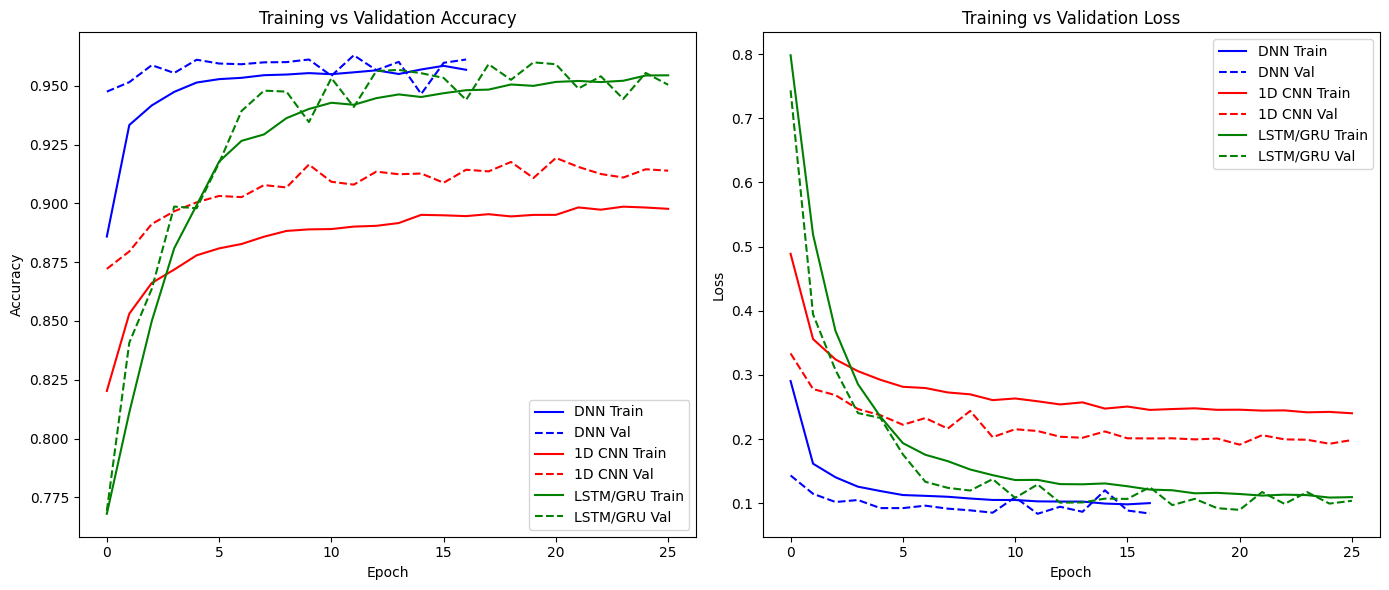

In [67]:
def plot_history(histories, model_names, model_colors):
    plt.figure(figsize=(14, 6))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    for history, name, color in zip(histories, model_names, model_colors):
        plt.plot(history.history['accuracy'], label=f'{name} Train', color=f'{color}')
        plt.plot(history.history['val_accuracy'], linestyle='--', label=f'{name} Val', color=f'{color}')
    plt.title('Training vs Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    for history, name, color in zip(histories, model_names, model_colors):
        plt.plot(history.history['loss'], label=f'{name} Train', color=f'{color}')
        plt.plot(history.history['val_loss'], linestyle='--', label=f'{name} Val', color=f'{color}')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history([history_dnn, history_cnn, history_rnn], ['DNN', '1D CNN', 'LSTM/GRU'], ['blue', 'red', 'green'])

In [68]:

y_pred_dnn = np.argmax(model_dnn.predict(X_test), axis=1)
y_pred_cnn = np.argmax(model_cnn.predict(X_test), axis=1)
y_pred_rnn = np.argmax(model_rnn.predict(X_test), axis=1)


312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
312/312 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step


d:\System Files\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\System Files\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\System Files\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


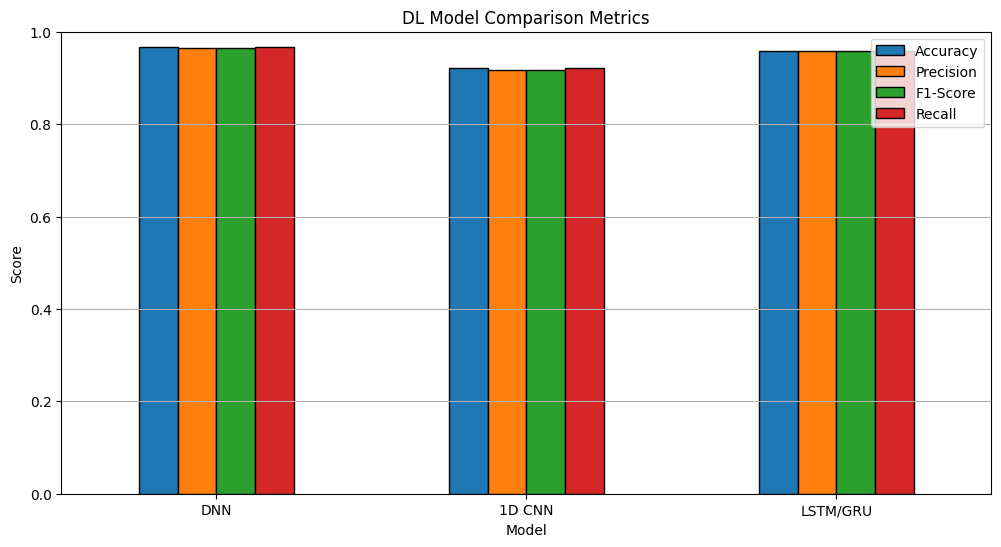

In [69]:
metrics_dl = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "F1-Score": [],
    "Recall": []
}

for name, preds in zip(['DNN', '1D CNN', 'LSTM/GRU'], [y_pred_dnn, y_pred_cnn, y_pred_rnn]):
    metrics_dl["Model"].append(name)
    metrics_dl["Accuracy"].append(accuracy_score(y_test, preds))
    metrics_dl["Precision"].append(precision_score(y_test, preds, average='weighted'))
    metrics_dl["F1-Score"].append(f1_score(y_test, preds, average='weighted'))
    metrics_dl["Recall"].append(recall_score(y_test, preds, average='weighted'))

df_dl_metrics = pd.DataFrame(metrics_dl)

df_dl_metrics.plot(
    x='Model', kind='bar',
    figsize=(12, 6), edgecolor='black',
    title='DL Model Comparison Metrics'
)
plt.xticks(rotation=0)
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


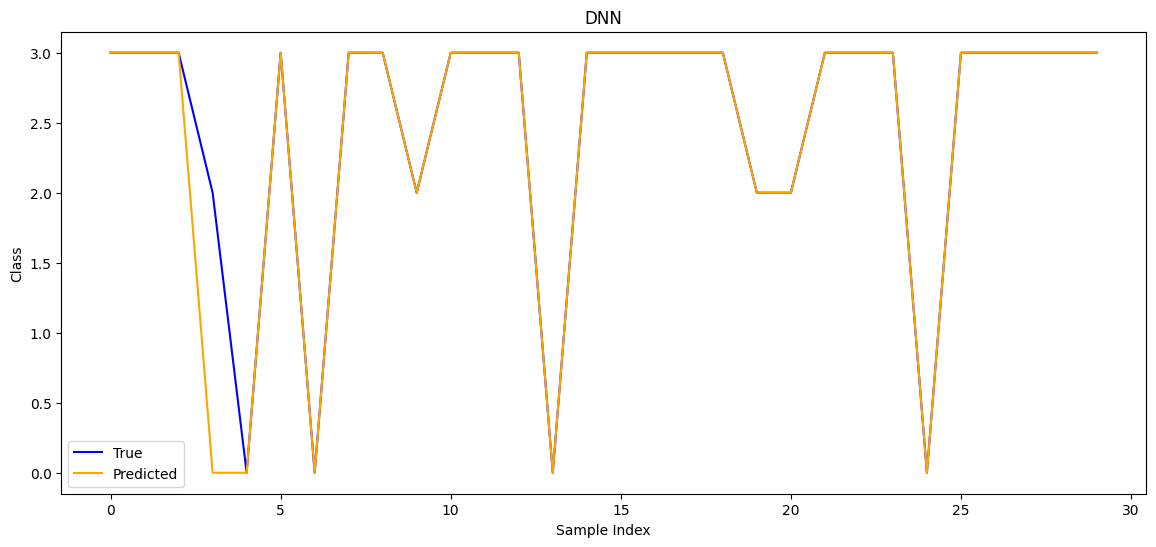

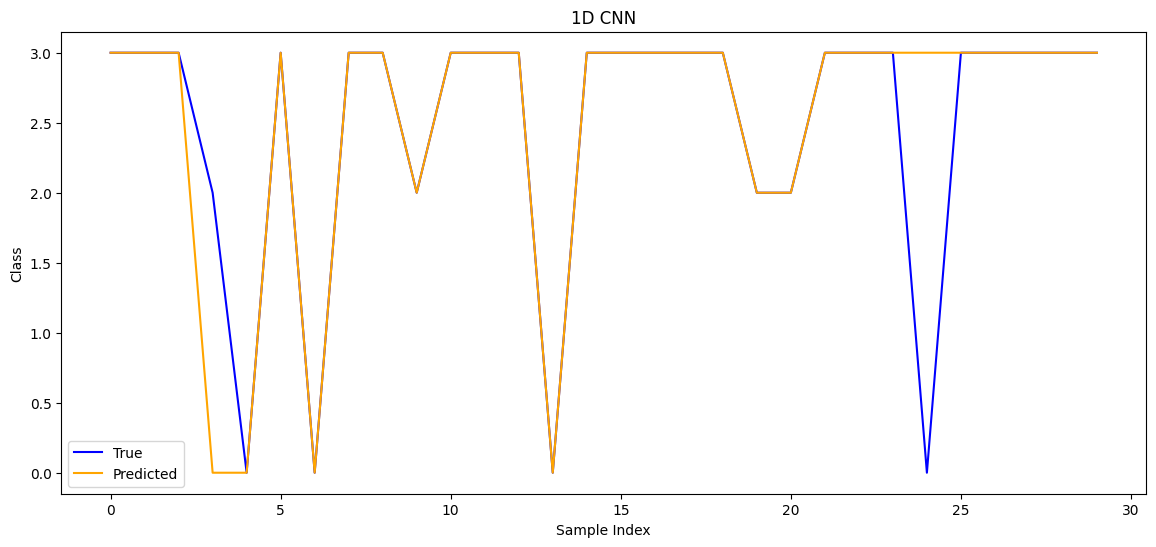

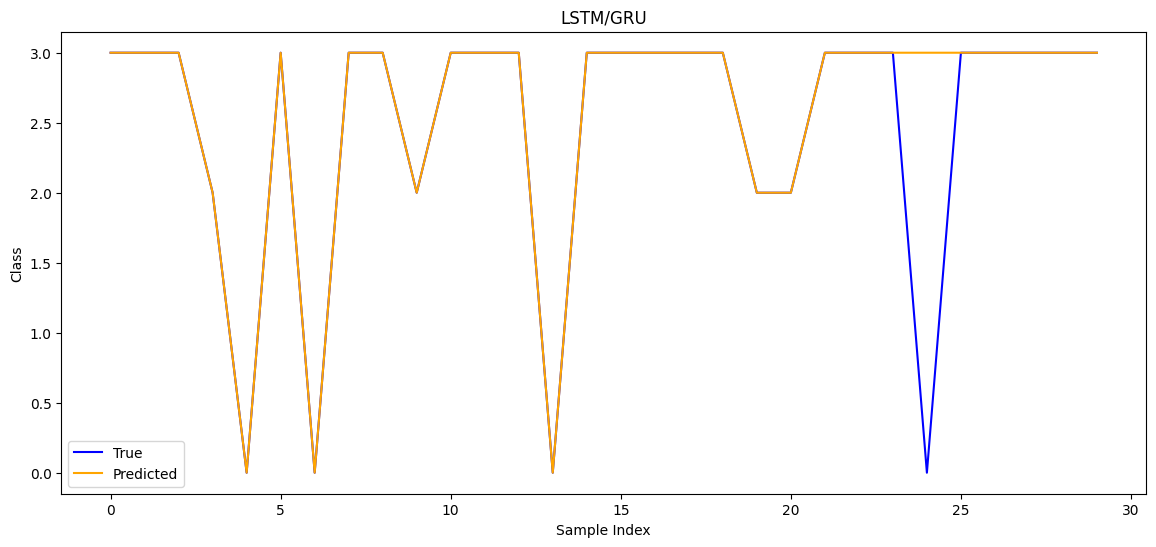

In [70]:
for i, (preds, name) in enumerate(zip([y_pred_dnn, y_pred_cnn, y_pred_rnn], ['DNN', '1D CNN', 'LSTM/GRU'])):
    plt.figure(figsize=(14, 6))
    plt.plot(y_test[:30], label="True", color="blue")
    plt.plot(preds[:30], label="Predicted", color="orange")
    plt.title(f"{name}")
    plt.xlabel('Sample Index')
    plt.ylabel('Class')
    plt.legend()

plt.show()

In [71]:
metrics_dl_df = pd.DataFrame(metrics_dl)
metrics_dl_df.set_index("Model", inplace=True)
metrics_dl_df.index.name = None

def highlight_best_classification(s):
    is_best = s == s.max()
    return ['background-color: blue' if v else '' for v in is_best]

styled_df = metrics_dl_df.style.apply(highlight_best_classification, axis=0).format("{:.2%}")
display(styled_df)

,Accuracy,Precision,F1-Score,Recall
DNN,96.61%,96.47%,96.53%,96.61%
1D CNN,92.21%,91.65%,91.76%,92.21%
LSTM/GRU,95.83%,95.72%,95.75%,95.83%


In [72]:
for name, preds in zip(['DNN', '1D CNN', 'LSTM/GRU'], [y_pred_dnn, y_pred_cnn, y_pred_rnn]):
    report = classification_report(y_test, preds, zero_division=1, target_names=['Average', 'Excellent', 'Good', 'Poor', 'Very Good'])
    print(f"\n{name} Classification Report:\n")
    print(report)


DNN Classification Report:

              precision    recall  f1-score   support

     Average       0.90      0.91      0.90      1348
   Excellent       1.00      0.00      0.00        14
        Good       0.87      0.86      0.86       435
        Poor       0.99      0.99      0.99      7664
   Very Good       0.94      0.92      0.93       502

    accuracy                           0.97      9963
   macro avg       0.94      0.73      0.74      9963
weighted avg       0.97      0.97      0.97      9963


1D CNN Classification Report:

              precision    recall  f1-score   support

     Average       0.79      0.65      0.71      1348
   Excellent       1.00      0.00      0.00        14
        Good       0.85      0.68      0.75       435
        Poor       0.95      0.98      0.96      7664
   Very Good       0.89      0.97      0.93       502

    accuracy                           0.92      9963
   macro avg       0.90      0.66      0.67      9963
weighted avg    